<a href="https://colab.research.google.com/github/Prabha14039/landslide-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('Book2new.csv')

# Assuming 'columns_to_drop' contains the names of columns you want to drop
columns_to_drop = ['Toposheet', 'Style',  'Distribution', 'Susceptibility']

# Drop the specified columns from the DataFrame
dataset.drop(columns=columns_to_drop, inplace=True)

# Define categorical features
categorical_features = [ 'State','District', 'Material Type', 'Movement Type',
                        'Failure Plane', 'Activity', 'Failure Mechanism',
                        'Geomorphology', 'Hydrology','Risk',
                         'Triggering Factor','Geoscientific Causes']

# Perform one-hot encoding for categorical features
encoded_features = pd.get_dummies(dataset[categorical_features])

# Drop the original categorical columns from the dataset
dataset.drop(columns=categorical_features, inplace=True)

# Concatenate the one-hot encoded features with the dataset
dataset_encoded = pd.concat([dataset, encoded_features], axis=1)

# Now, dataset_encoded contains the one-hot encoded features
print(dataset_encoded.head())


   Longitude  Latitude  Length  Width  Height  State_Jammu and Kahmir  \
0   75.77849  33.25291     100     25    80.0                    True   
1   75.77613  33.25361     100    110    60.0                    True   
2   75.77756  33.25196     110     35    90.0                    True   
3   75.77632  33.25996      90     50    80.0                    True   
4   75.76930  33.27594      60     50    50.0                    True   

   State_Uttarakhand  District_Almora  District_Bageshwar  District_Bandipora  \
0              False            False               False               False   
1              False            False               False               False   
2              False            False               False               False   
3              False            False               False               False   
4              False            False               False               False   

   ...  Geoscientific Causes_weak rock mass and road cutting  \
0  ...    

In [ ]:
encoded_features

,State_Jammu and Kahmir,State_Uttarakhand,District_Almora,District_Bageshwar,District_Bandipora,District_Baramulla,District_Chamoli,District_Ganderbal,District_Kishtwar,District_Kupwara,...,Geoscientific Causes_weak rock mass and road cutting,Geoscientific Causes_weak rock mass on steep slope,Geoscientific Causes_weatheared material saturatio with water craks deveolped steep slope,"Geoscientific Causes_weatherd rock,water action, road cutting",Geoscientific Causes_weathered rock toe cut by river,Geoscientific Causes_weathered rock with loose debris saturation with water,Geoscientific Causes_wedge failure,Geoscientific Causes_wedge failure due to joint pattern,"Geoscientific Causes_wedge failure due to valley diping joint, steep slope","Geoscientific Causes_wedge failure, one joiny is vallley dipping"
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
588,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
589,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
590,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
dataset = pd.read_csv('Book2new.csv')

# Assuming 'columns_to_drop' contains the names of columns you want to drop
columns_to_drop = ['Toposheet', 'Style',  'Distribution',
                   'Susceptibility']

# Drop the specified columns from the DataFrame
dataset.drop(columns=columns_to_drop, inplace=True)

# Define categorical features
categorical_features = ['State', 'District', 'Material Type', 'Movement Type',
                        'Failure Plane', 'Activity', 'Failure Mechanism','Risk',
                        'Geomorphology', 'Hydrology', 'Triggering Factor']

# Perform one-hot encoding for categorical features
one_hot_encoder = OneHotEncoder()  # No sparse parameter specified
encoded_features = one_hot_encoder.fit_transform(dataset[categorical_features])

# Convert the sparse matrix to a dense array
encoded_features_array = encoded_features.toarray()

# Get the unique category names for each categorical feature
encoded_columns = []
for i, col in enumerate(categorical_features):
    unique_values = dataset[col].unique()
    for value in unique_values:
        encoded_columns.append(f"{col}_{value}")

# Convert the encoded features array into a DataFrame
encoded_df = pd.DataFrame(encoded_features_array, columns=encoded_columns)

# Concatenate the encoded features DataFrame with any remaining numeric features
X = pd.concat([encoded_df, dataset.select_dtypes(include=[np.number]).reset_index(drop=True)], axis=1)

# Drop the 'Geoscientific Causes' column from the feature matrix (assuming it's the target variable)
y = dataset['Risk']

print(X.head())
print(y.head())


   State_Jammu and Kahmir  State_Uttarakhand  District_Kishtwar  \
0                     1.0                0.0                0.0   
1                     1.0                0.0                0.0   
2                     1.0                0.0                0.0   
3                     1.0                0.0                0.0   
4                     1.0                0.0                0.0   

   District_Reasi  District_Poonch  District_Baramulla  District_Ganderbal  \
0             0.0              0.0                 0.0                 0.0   
1             0.0              0.0                 0.0                 0.0   
2             0.0              0.0                 0.0                 0.0   
3             0.0              0.0                 0.0                 0.0   
4             0.0              0.0                 0.0                 0.0   

   District_Bandipora  District_Kupwara  District_Leh  ...  \
0                 0.0               1.0           0.0  ...   
1   

In [ ]:

X


,State_Jammu and Kahmir,State_Uttarakhand,District_Kishtwar,District_Reasi,District_Poonch,District_Baramulla,District_Ganderbal,District_Bandipora,District_Kupwara,District_Leh,...,Triggering Factor_ loos unconsolidated material,Triggering Factor_loos unconsolidated material,Triggering Factor_Natural,Triggering Factor_Natutal,Triggering Factor_Anthropogeic,Longitude,Latitude,Length,Width,Height
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,75.778490,33.252910,100,25,80.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,75.776130,33.253610,100,110,60.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,75.777560,33.251960,110,35,90.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,75.776320,33.259960,90,50,80.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,75.769300,33.275940,60,50,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79.564829,29.998605,50,25,45.0
588,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79.564873,29.997805,80,60,70.0
589,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79.565403,29.996708,70,90,65.0
590,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,79.565371,29.995494,80,30,70.0


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the entire dataset
X_processed = preprocessor.fit_transform(X)

# X_processed is the preprocessed dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_y = LabelEncoder()

# Encode the target variable (y)
y_encoded = label_encoder_y.fit_transform(y)


# Remove rows with NaNs in y_encoded and corresponding rows in X
indices_with_nan = np.isnan(y_encoded)
X_processed = X[~indices_with_nan]
y_processed = y_encoded[~indices_with_nan]


In [ ]:
import pandas as pd

# Assuming X is your feature matrix
# Replace NaN values with 0
X_filled = X_processed.fillna(0)


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.5 MB/s eta

In [ ]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split  # Add this import statement
import pandas as pd

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.2, random_state=42)

# Create a DataFrame from X_train and y_train
train_data = pd.DataFrame(X_train, columns=X_filled.columns)
train_data['Label'] = y_train  # Rename the target column to 'Label'

# Create a DataFrame from X_test and y_test
test_data = pd.DataFrame(X_test, columns=X_filled.columns)
test_data['Label'] = y_test  # Rename the target column to 'Label'

# Initialize PyCaret
reg_setup = setup(data=train_data, target='Label')

# Compare Regression Models
best_model = compare_models()

# Evaluate the Best Model on the test set
evaluate_model(best_model)

# Make predictions on the test set
predictions = predict_model(best_model, data=test_data)

# Further steps (if needed) such as plotting, saving the model, etc.


,Description,Value
0,Session id,2512
1,Target,Label
2,Target type,Regression
3,Original data shape,"(534, 144)"
4,Transformed data shape,"(534, 144)"
5,Transformed train set shape,"(373, 144)"
6,Transformed test set shape,"(161, 144)"
7,Numeric features,143
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0149,0.0117,0.0554,0.9933,0.0114,0.0043,0.0430
lr,Linear Regression,0.0100,0.0373,0.0611,0.9797,0.0106,0.0015,0.0530
br,Bayesian Ridge,0.0100,0.0373,0.0611,0.9797,0.0106,0.0015,0.0460
dt,Decision Tree Regressor,0.0108,0.0432,0.0658,0.9765,0.0117,0.0016,0.0410
gbr,Gradient Boosting Regressor,0.0215,0.0481,0.0901,0.9740,0.0177,0.0055,0.1580
et,Extra Trees Regressor,0.0123,0.0560,0.0748,0.9696,0.0141,0.0018,0.2800
rf,Random Forest Regressor,0.0275,0.0627,0.1372,0.9673,0.0227,0.0054,0.2230
ridge,Ridge Regression,0.1276,0.1235,0.2948,0.9216,0.0845,0.0445,0.0630
ada,AdaBoost Regressor,0.2857,0.1982,0.4323,0.8562,0.1085,0.1265,0.1430
lightgbm,Light Gradient Boosting Machine,0.3027,0.5488,0.6236,0.7102,0.2176,0.0847,0.1780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,0.0103,0.0007,0.0261,0.9995,0.0084,0.0044


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from pycaret.regression import *


# Split the data into training and testing sets
#ssuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.2, random_state=42)

# Create a DataFrame from X_train and y_train
train_data = pd.DataFrame(X_train, columns=X_filled.columns)
train_data['Label'] = y_train  # Rename the target column to 'Label'

# Create a DataFrame from X_test and y_test
test_data = pd.DataFrame(X_test, columns=X_filled.columns)
test_data['Label'] = y_test  # Rename the target column to 'Label'

# Initialize PyCaret
reg_setup = setup(data=train_data, target='Label')

# Compare different regression models
compare_models()

# Create a Lasso regression model using PyCaret
lasso_model = create_model('lasso')

# Fine-tune the Lasso model
tuned_lasso_model = tune_model(lasso_model)

# Evaluate the model
evaluate_model(tuned_lasso_model)

# Finalize the model
final_lasso_model = finalize_model(tuned_lasso_model)

# Make predictions on new data
new_data_predictions = predict_model(final_lasso_model, data=test_data)


,Description,Value
0,Session id,6814
1,Target,Label
2,Target type,Regression
3,Original data shape,"(473, 118)"
4,Transformed data shape,"(473, 118)"
5,Transformed train set shape,"(331, 118)"
6,Transformed test set shape,"(142, 118)"
7,Numeric features,117
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,17.6232,641.5505,24.4734,0.6837,0.5303,0.6079,0.0420
rf,Random Forest Regressor,15.9036,654.7387,24.4080,0.6828,0.4943,0.6151,0.3610
ridge,Ridge Regression,17.5289,651.1470,24.7182,0.6758,0.5429,0.6006,0.0370
gbr,Gradient Boosting Regressor,16.3187,687.0286,25.1518,0.6646,0.5192,0.6463,0.1410
ada,AdaBoost Regressor,20.5713,699.2514,25.8228,0.6561,0.5591,0.6918,0.1300
huber,Huber Regressor,18.0811,713.3054,25.6145,0.6541,0.5509,0.6026,0.0760
lightgbm,Light Gradient Boosting Machine,18.4071,748.9456,26.3512,0.6319,0.5362,0.6401,0.1870
et,Extra Trees Regressor,15.3991,756.5274,26.4354,0.6266,0.5349,0.5846,0.2520
xgboost,Extreme Gradient Boosting,16.5935,781.2435,27.0728,0.6101,0.5137,0.6605,0.1520
llar,Lasso Least Angle Regression,20.7414,834.7186,27.9652,0.5941,0.6257,0.7809,0.0480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.3596,596.9503,24.4326,0.7453,0.6522,0.8939
1,32.9853,2142.0214,46.2820,0.2259,1.0431,3.0910
2,16.3131,491.7667,22.1758,0.7043,0.5656,0.5910
3,19.4253,819.5389,28.6276,0.5439,0.6250,0.8144
4,21.7181,792.7004,28.1549,0.6054,0.5395,0.5997
5,18.4949,584.8230,24.1831,0.6923,0.3903,0.3635
6,18.7893,650.0721,25.4965,0.5789,0.4907,0.5084
7,15.2430,438.5700,20.9421,0.7226,0.7581,0.2296
8,18.7336,566.6875,23.8052,0.6899,0.3137,0.2754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.1998,400.6306,20.0158,0.8290,0.5638,0.6762
1,32.2185,2129.0482,46.1416,0.2306,1.0352,3.0436
2,15.3720,419.9908,20.4937,0.7474,0.5268,0.5104
3,17.1569,635.2764,25.2047,0.6464,0.5674,0.6801
4,19.7541,692.9040,26.3231,0.6550,0.5024,0.5339
5,18.0814,546.2440,23.3719,0.7126,0.3681,0.3427
6,16.7481,533.8825,23.1059,0.6542,0.4542,0.4415
7,16.1766,465.9819,21.5866,0.7053,0.6868,0.2419
8,17.7302,547.6367,23.4016,0.7004,0.3060,0.2659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,18.7249,733.5747,27.0846,0.6524,0.5615,0.7890


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.regression import *

# Assuming X_filled and y_processed are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.2, random_state=42)

# Create a DataFrame from X_train and y_train
train_data = pd.DataFrame(X_train, columns=X_filled.columns)
train_data['Label'] = y_train  # Rename the target column to 'Label'

# Initialize PyCaret
reg_setup = setup(data=train_data, target='Label')

# Compare different regression models
models_to_compare = ['rf', 'br', 'xgboost']
compare_models(include=models_to_compare)

# Create Random Forest model
rf_model = create_model('rf')

# Create Lasso Regression model
lasso_model = create_model('br')

# Create XGBoost model
xgboost_model = create_model('xgboost')

# Evaluate Random Forest model
evaluate_model(rf_model)

# Evaluate Lasso Regression model
evaluate_model(lasso_model)

# Evaluate XGBoost model
evaluate_model(xgboost_model)

# Finalize the best performing model (e.g., based on evaluation results)
final_model = finalize_model(rf_model)

# Make predictions on new data
new_data_predictions = predict_model(final_model, data=pd.DataFrame(X_test, columns=X_filled.columns))

# Optionally, you can also access the feature importance for the finalized model
feature_importance = final_model.feature_importances_

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X_filled.columns, feature_importance):
    print(f"{feature}: {importance}")


,Description,Value
0,Session id,1916
1,Target,Label
2,Target type,Regression
3,Original data shape,"(473, 118)"
4,Transformed data shape,"(473, 118)"
5,Transformed train set shape,"(331, 118)"
6,Transformed test set shape,"(142, 118)"
7,Numeric features,117
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,14.7770,561.0968,22.4708,0.7026,0.4290,0.3881,0.2950
br,Bayesian Ridge,16.3521,562.2062,22.9051,0.6985,0.4827,0.4074,0.0650
xgboost,Extreme Gradient Boosting,15.8647,646.2625,24.2446,0.6565,0.4929,0.4094,0.1990


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.3521,264.6964,16.2695,0.8589,0.2818,0.1962
1,13.1715,301.0316,17.3503,0.8583,0.4628,0.4465
2,15.7494,566.7527,23.8066,0.8050,0.5554,0.3205
3,11.3024,274.4786,16.5674,0.8507,0.2949,0.2129
4,22.3424,1820.4974,42.6673,0.0486,0.8426,1.4434
5,16.1748,433.0448,20.8097,0.7712,0.4038,0.3354
6,11.3073,262.0224,16.1871,0.8105,0.3111,0.2154
7,15.3130,554.8661,23.5556,0.6374,0.3231,0.2374
8,15.7997,486.4810,22.0563,0.7466,0.2862,0.2370


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.1356,402.2471,20.0561,0.7856,0.5588,0.2370
1,14.3214,367.9608,19.1823,0.8268,0.4857,0.4885
2,16.2080,448.2978,21.1730,0.8458,0.7165,0.4470
3,12.9457,292.6462,17.1069,0.8409,0.2612,0.2090
4,23.3039,1522.0761,39.0138,0.2046,0.8151,1.2818
5,16.6150,405.4629,20.1361,0.7857,0.3984,0.3604
6,13.4416,297.6164,17.2516,0.7847,0.3093,0.2428
7,16.4944,604.6416,24.5895,0.6049,0.3258,0.2584
8,18.3289,570.1689,23.8782,0.7030,0.3118,0.2765


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.5224,257.7449,16.0544,0.8626,0.6417,0.2030
1,13.5283,365.2723,19.1121,0.8281,0.5093,0.5065
2,18.7756,871.2777,29.5174,0.7002,0.6505,0.4010
3,12.6580,416.2189,20.4014,0.7737,0.3224,0.2427
4,23.0959,1902.7385,43.6204,0.0056,0.8813,1.4658
5,13.6628,348.4913,18.6679,0.8158,0.4465,0.2796
6,15.6981,456.7770,21.3723,0.6696,0.3475,0.2626
7,18.2107,794.1897,28.1814,0.4810,0.3242,0.2359
8,14.9538,404.7505,20.1184,0.7891,0.2725,0.2247


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Feature Importance:
State_Jammu and Kahmir: 0.02028513119356793
State_Uttarakhand: 0.033578386891416706
District_Kishtwar: 3.321502710752656e-05
District_Reasi: 0.0003630455332001012
District_Poonch: 0.000503971426189785
District_Baramulla: 0.00018920927662904278
District_Ganderbal: 0.00022355354041240765
District_Bandipora: 9.226337165735792e-05
District_Kupwara: 0.16998040993460609
District_Leh: 0.0001455556931331608
District_Bageshwar: 0.16901750307546798
District_Almora: 0.00047038861851929364
District_Chamoli: 0.0011774895502916622
Material Type_Debris cum rock: 0.0011709557623365962
Material Type_rock: 0.0005100820452372568
Material Type_debris: 0.0014937046783273613
Material Type_Rock cum debris: 0.043920438251990754
Material Type_rock  : 0.002098412915397849
Material Type_Rock: 2.736384926484072e-08
Material Type_debris : 0.006893589262262328
Material Type_rock cum debris: 0.001011368485267105
Material Type_Debris : 0.0029493756679461725
Material Type_Debris: 0.0017290647254595

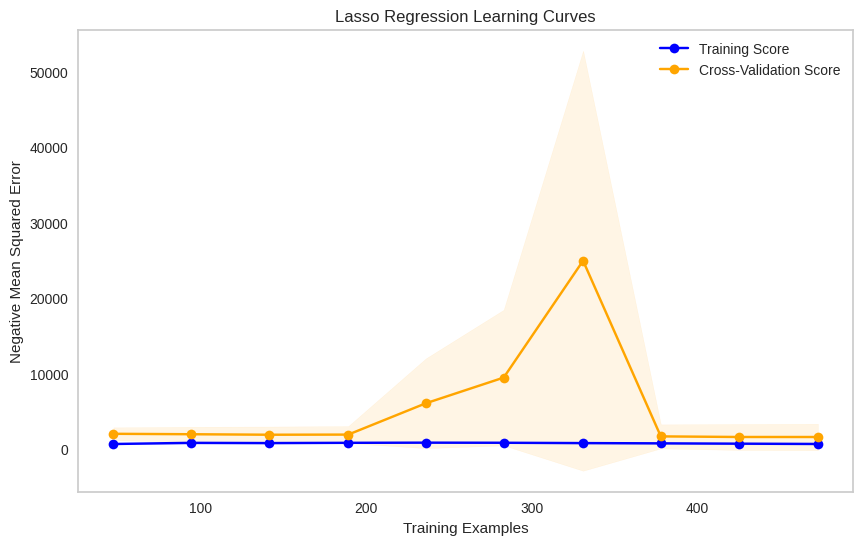

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve

# Assuming X_filled and y_processed are your feature matrix and target variable
# Also assuming X_filled and y_processed are already split into training and testing sets

# Define the Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)  # Adjust alpha as needed

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lasso_model, X_filled, y_processed, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_mean_squared_error', random_state=42  # Adjust CV and scoring as needed
)

# Calculate mean and standard deviation of training scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title('Lasso Regression Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Negative Mean Squared Error')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_mean, marker='o', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, marker='o', color='orange', label='Cross-Validation Score')

plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
y_train.shape


(532,)

In [ ]:
X_train.shape


(532, 117)

In [ ]:
print(lasso_train_preds.shape)
print(X_train_rf.shape)
print(X_train.shape)
y_train.shape




(532,)
(583, 118)
(532, 117)


(532,)

In [ ]:
X_train_rf.shapeX_train_rf.shape


(583, 118)

In [ ]:
lasso_preds.shape

NameError: name 'lasso_preds' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Assuming X_filled and y_processed are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.4, random_state=42)

# Define hyperparameters to search for Ridge model
ridge_param_grid = {'alpha': np.logspace(-4, 4, 9)}

# Initialize Ridge GridSearchCV
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit Ridge GridSearchCV to the training data
ridge_grid_search.fit(X_train, y_train)

# Define hyperparameters to search for Lasso model
lasso_param_grid = {'alpha': np.logspace(-4, 4, 9)}

# Initialize Lasso GridSearchCV
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit Lasso GridSearchCV to the training data
lasso_grid_search.fit(X_train, y_train)

# Initialize ensemble models
ridge_model = ridge_grid_search.best_estimator_
lasso_model = lasso_grid_search.best_estimator_
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train ensemble models on the training data
ridge_train_preds = ridge_model.predict(X_train)
lasso_train_preds = lasso_model.predict(X_train)
rf_model.fit(X_train, y_train)

# Evaluate the ensemble model
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Calculate the ensemble Train and Test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train RMSE: 9.0611
Test RMSE: 24.5167


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Initialize Ridge model
ridge_model = Ridge()

# Define hyperparameters to search
param_grid = {'alpha': np.logspace(-4, 4, 9)}

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding Train and Test RMSE
print(f"Best hyperparameters: {grid_search.best_params_}")

ridge_model = grid_search.best_estimator_
ridge_train_preds = ridge_model.predict(X_train)
ridge_test_preds = ridge_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_preds))

print(f"Train RMSE (Ridge): {train_rmse:.4f}")
print(f"Test RMSE (Ridge): {test_rmse:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'alpha': 10.0}
Train RMSE (Ridge): 22.0606
Test RMSE (Ridge): 25.3536


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assuming X_filled and y_processed are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.1, random_state=42)

# Train the Lasso Regression model
lasso_model = Lasso()
param_grid = {'alpha': np.logspace(-4, 4, 9)}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best Lasso model for prediction
lasso_model = grid_search.best_estimator_
lasso_train_preds = lasso_model.predict(X_train)
lasso_test_preds = lasso_model.predict(X_test)

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
# Create new feature matrix with Lasso predictions for training data
X_train_rf = np.hstack((X_train_df, lasso_train_preds.reshape(-1, 1)))
X_train_rf = pd.DataFrame(X_train_rf, columns=X_train_df.columns.tolist() + ['lasso_preds'])

# Train the Ridge Regression model
ridge_model = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 9)}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best Ridge model for prediction
ridge_model = grid_search.best_estimator_
ridge_train_preds = ridge_model.predict(X_train)
ridge_test_preds = ridge_model.predict(X_test)

# Create new feature matrix with Ridge predictions for training data
ridge_train_preds = ridge_model.predict(X_train)
X_train_rf = np.hstack((X_train_rf, ridge_train_preds.reshape(-1, 1)))

# Convert to DataFrame and rename columns
X_train_rf = pd.DataFrame(X_train_rf, columns=X_train_rf.columns[:-1].tolist() + ['ridge_preds'])

# Train Random Forest on new feature matrix
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest model
rf_model.fit(X_train_rf.drop(['lasso_preds', 'ridge_preds'], axis=1), y_train)  # Train Random Forest model

# Evaluate the ensemble model
rf_train_preds = rf_model.predict(X_train_rf.drop(['lasso_preds', 'ridge_preds'], axis=1))
rf_test_preds = rf_model.predict(pd.DataFrame(np.hstack((X_test, lasso_test_preds.reshape(-1, 1), ridge_test_preds.reshape(-1, 1))), columns=X_test.columns.tolist() + ['lasso_preds', 'ridge_preds']))

train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

print(f"Train RMSE (Ensemble): {train_rmse:.4f}")
print(f"Test RMSE (Ensemble): {test_rmse:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Decode the predictions
decoded_predictions = label_encoder_y.inverse_transform(predictions['Label'])

# Add the decoded predictions to the DataFrame
predictions['decoded_label'] = decoded_predictions

# View the DataFrame with decoded predictions
print(predictions[['Label', 'decoded_label']])


     Label                                      decoded_label
220    137           weatherd rock,water action, road cutting
42      75                       highly jointed, road cutting
286     21                     Phyllite dipping towards road 
181     93  loose debris and fractured rock material gets ...
56       8  Highly jointed rock, one joint valley dipping,...
..     ...                                                ...
342    134                    weak rock mass and road cutting
195     98  loose debris material gets saturation with wat...
242     34  Toe cutting at base and oversaturation of wate...
93      64     highly fractured rock steep slope water action
185     97  loose debris material gets saturated with wate...

[71 rows x 2 columns]


In [ ]:
from pycaret.regression import *

# Assuming 'train_data' is your training dataset with the 'Label' target variable
reg_setup_rf = setup(data=train_data, target='Label')


# Train XGBoost model
lboost_model = create_model('lightgbm', verbose=False)

# Combine models using 'blend_models'
blended_model = blend_models(estimator_list=[final_model, lboost_model], verbose=False)

# Make predictions on new data
# Assuming 'new_data' is your new dataset
predictions = predict_model(blended_model, data=X_test)

# Decode the predictions if needed
decoded_predictions = label_encoder_y.inverse_transform(predictions['Label'])
predictions['decoded_label'] = decoded_predictions

# View the DataFrame with decoded predictions
print(predictions[['Label', 'decoded_label']])


,Description,Value
0,Session id,7590
1,Target,Label
2,Target type,Regression
3,Original data shape,"(283, 19)"
4,Transformed data shape,"(283, 19)"
5,Transformed train set shape,"(198, 19)"
6,Transformed test set shape,"(85, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,22.6879,1302.4725,36.0898,0.2819,0.8097,1.4121


     Label                                      decoded_label
220    137           weatherd rock,water action, road cutting
42      75                       highly jointed, road cutting
286     21                     Phyllite dipping towards road 
181     93  loose debris and fractured rock material gets ...
56       8  Highly jointed rock, one joint valley dipping,...
..     ...                                                ...
342    134                    weak rock mass and road cutting
195     98  loose debris material gets saturation with wat...
242     34  Toe cutting at base and oversaturation of wate...
93      64     highly fractured rock steep slope water action
185     97  loose debris material gets saturated with wate...

[71 rows x 2 columns]


In [ ]:
# Get R-squared (R2) from the results
r2_score = get_metrics().loc[get_metrics()['Metric'] == 'R2', 'Score'].values[0]
print(f'R2 Score: {r2_score}')

KeyError: 'Metric'

In [ ]:
# Evaluate the final blended model
evaluate_model(blended_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Assuming label_encoder_y is your LabelEncoder object used for encoding the target variable
# Decode the predictions
decoded_predictions = label_encoder_y.inverse_transform(predictions['Label'])

# Convert the decoded predictions to a DataFrame for easier concatenation
decoded_df = pd.DataFrame(decoded_predictions, columns=['Decoded_Label'])

# Concatenate X_test, y_test, and the decoded predictions
result_df = pd.concat([X_test, pd.DataFrame(y_test, columns=['Original_Label']), decoded_df], axis=1)

# View the result DataFrame
print(result_df)


     District  Material Type  Movement Type  Failure Plane  Activity  \
220       7.0            8.0            1.0            1.0       1.0   
42        3.0            9.0            7.0            1.0       1.0   
286       0.0            0.0            1.0            1.0       1.0   
181       3.0            7.0            1.0            1.0       1.0   
56        3.0            3.0            1.0            1.0       1.0   
..        ...            ...            ...            ...       ...   
66        NaN            NaN            NaN            NaN       NaN   
67        NaN            NaN            NaN            NaN       NaN   
68        NaN            NaN            NaN            NaN       NaN   
69        NaN            NaN            NaN            NaN       NaN   
70        NaN            NaN            NaN            NaN       NaN   

     Failure Mechanism  Geomorphology  Weathering  Hydrology  Susceptibility  \
220                0.0            7.0         5.0      

In [ ]:
# Assuming label_encoder_y is your LabelEncoder object used for encoding the target variable
# Use the inverse_transform method to decode the predictions
decoded_predictions = label_encoder_y.inverse_transform(predictions['Label'])

# View the decoded predictions
print(decoded_predictions)


['weatherd rock,water action, road cutting' 'highly jointed, road cutting'
 'Phyllite dipping towards road '
 'loose debris and fractured rock material gets saturtated with water'
 'Highly jointed rock, one joint valley dipping, wedge failure'
 'oversaturation of material with water'
 'loose debris material saturation with water losses shear strenth'
 'Highly jointed rock, one joint valley dipping, wedge failure'
 'loose debris  material, water action' 'weak rock mass and road cutting'
 'losse wathered material water action steep slope'
 'loose debris material saturation with water, steep slope'
 'weak rock mass and road cutting' 'weak rock mass and road cutting'
 'loose debris, gulliesdevelop, fractured rock, locsl fault also observed'
 'Fracture failure' 'loose debis and jointed rock, water action'
 'fractured rock , fragile rock, water action, vulnerable slope'
 'weak rock mass' 'Unstable slope'
 'loose debris of phyllite, water action' 'Improper mining activity'
 'Oversaturation of

In [ ]:
from pycaret.regression import *

# Assuming 'train_data' is your training dataset
reg_setup = setup(data=train_data, target='Label')

# Compare multiple regression models, including boosting algorithms
best_model = compare_models(include=['lightgbm', 'ada', 'gbr', 'xgboost', 'ridge', 'lr', 'llar', 'lasso', 'br', 'en', 'huber'])

# If you want to specifically train a boosting model like LightGBM
lgbm_model = create_model('lightgbm')

# Evaluate the boosting model
evaluate_model(lgbm_model)


,Description,Value
0,Session id,5519
1,Target,Label
2,Target type,Regression
3,Original data shape,"(283, 19)"
4,Transformed data shape,"(283, 19)"
5,Transformed train set shape,"(198, 19)"
6,Transformed test set shape,"(85, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17.1528,616.1344,23.8667,0.6233,0.4282,0.4509,0.8910
gbr,Gradient Boosting Regressor,17.4128,670.3006,25.4730,0.5840,0.4521,0.4617,0.1070
ridge,Ridge Regression,20.4676,735.9604,26.5463,0.5505,0.4671,0.4564,0.0280
lr,Linear Regression,20.5527,739.4770,26.6054,0.5495,0.4730,0.4613,0.0280
llar,Lasso Least Angle Regression,20.8346,735.9623,26.5547,0.5494,0.4568,0.4789,0.0320
lasso,Lasso Regression,20.8347,735.9716,26.5549,0.5494,0.4568,0.4789,0.0310
xgboost,Extreme Gradient Boosting,18.1345,775.3667,27.2903,0.5300,0.4919,0.5381,0.1000
br,Bayesian Ridge,21.4995,767.7784,27.1735,0.5288,0.4660,0.4893,0.0310
ada,AdaBoost Regressor,22.5513,817.9797,28.2993,0.5025,0.4976,0.5889,0.1540
en,Elastic Net,23.7863,845.2285,28.6293,0.4821,0.5072,0.5723,0.0280


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.0693,533.7040,23.1020,0.6950,0.3944,0.3403
1,12.3502,238.3701,15.4392,0.8309,0.3301,0.2797
2,18.4888,531.5149,23.0546,0.6697,0.3451,0.3167
3,25.6468,1155.5551,33.9935,0.1922,0.5149,0.3485
4,19.2268,1223.1543,34.9736,0.3743,0.8243,1.4387
5,12.6660,331.9815,18.2204,0.8487,0.5032,0.5170
6,13.3108,315.7506,17.7694,0.8293,0.3863,0.3553
7,13.2844,325.3547,18.0376,0.7351,0.2210,0.1691
8,17.1608,499.9209,22.3589,0.7447,0.3440,0.3204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [150,100, 200],  # Adjust the number of trees
    'max_depth': [None, 10, 20, 30],  # Adjust the maximum depth of each tree
    # Add more parameters to fine-tune as needed
}
from sklearn.metrics import accuracy_score


# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed)

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict the target variable on the test set using the best model
best_predictions = best_rf_model.predict(X_test)

# Evaluate the model's accuracy
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best Model Accuracy: {best_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}
Best Model Accuracy: 0.4157303370786517


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_processed, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importance = rf_regressor.feature_importances_
print('Feature Importance:', feature_importance)


Mean Squared Error: 1047.1517971830983
Feature Importance: [0.00287036 0.03341735 0.0367061  0.01001875 0.00318692 0.0030965
 0.01739415 0.01719776 0.01025948 0.01536455 0.00887196 0.01885981
 0.03445768 0.29483858 0.40819785 0.02000609 0.03468852 0.03056761]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize Gradient Boosting classifier with Random Forest as base estimator
gb_rf_classifier = GradientBoostingClassifier(init=rf_classifier, n_estimators=100, random_state=42)

# Train the Gradient Boosting classifier
gb_rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting with Random Forest Accuracy:", accuracy)


Gradient Boosting with Random Forest Accuracy: 0.36619718309859156


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize the BaggingClassifier with RandomForestClassifier as base estimator
bag = BaggingClassifier(base_estimator=rf, n_estimators=100, n_jobs=-1)

# Fit the model to the training data
bag.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bag.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Bagging with Random Forest Accuracy:", accuracy)

# Initialize the BaggingClassifier with GradientBoostingClassifier as base estimator
bag = BaggingClassifier(base_estimator=gb, n_estimators=100, n_jobs=-1)

# Fit the model to the training data
bag.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bag.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Bagging with Gradient Boosting Accuracy:", accuracy)

A:\pycharma\ancoda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging with Random Forest Accuracy: 0.5774647887323944


A:\pycharma\ancoda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
